# IMPORTING THE LIBARIES

In [1]:
# DataFrame Libraries
import pandas as pd
import numpy as np

#DataVisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the categorical imputer
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

#Label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score,KFold,learning_curve

#Math Libraries
import scipy.stats as sci

#Metrices Libraries
from sklearn.metrics import accuracy_score,mean_squared_error

#Machine Learning Model Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
import xgboost
from xgboost import XGBClassifier


In [2]:
Data = pd.read_csv('insuranceFraud.csv',na_values='?')
Insurancemain_pre = Data.copy()

In [3]:
Insurancemain_pre.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
Insurancemain_pre=Insurancemain_pre.replace('?',np.nan)
Insurancemain_pre

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [5]:
Insurancemain_pre.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
#Code to see all the rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
Insurancemain_pre.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [8]:
#Checking for Categorical Columns
cat_df = Insurancemain_pre.select_dtypes(include=['object']).copy()
cat_df.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [9]:
#Trying to find all the unique values in the column
cols= ['policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city',
       'property_damage', 'police_report_available',
       'fraud_reported']
for i in cols:
    unique_cat = list(set(Insurancemain_pre[i]))
    print(f"The Unique elements in {i} are : {unique_cat} \n\n")

The Unique elements in policy_state are : ['IN', 'IL', 'OH'] 


The Unique elements in policy_csl are : ['100/300', '500/1000', '250/500'] 


The Unique elements in insured_sex are : ['FEMALE', 'MALE'] 


The Unique elements in insured_education_level are : ['MD', 'PhD', 'College', 'Masters', 'JD', 'High School', 'Associate'] 


The Unique elements in insured_occupation are : ['other-service', 'sales', 'armed-forces', 'prof-specialty', 'priv-house-serv', 'farming-fishing', 'handlers-cleaners', 'adm-clerical', 'tech-support', 'craft-repair', 'machine-op-inspct', 'transport-moving', 'protective-serv', 'exec-managerial'] 


The Unique elements in insured_hobbies are : ['skydiving', 'sleeping', 'polo', 'chess', 'basketball', 'bungie-jumping', 'kayaking', 'exercise', 'golf', 'movies', 'cross-fit', 'hiking', 'video-games', 'camping', 'reading', 'paintball', 'yachting', 'board-games', 'dancing', 'base-jumping'] 


The Unique elements in insured_relationship are : ['not-in-family', 'unmarried'

In [10]:
# checking for missing Values
Insurancemain_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

<AxesSubplot:>

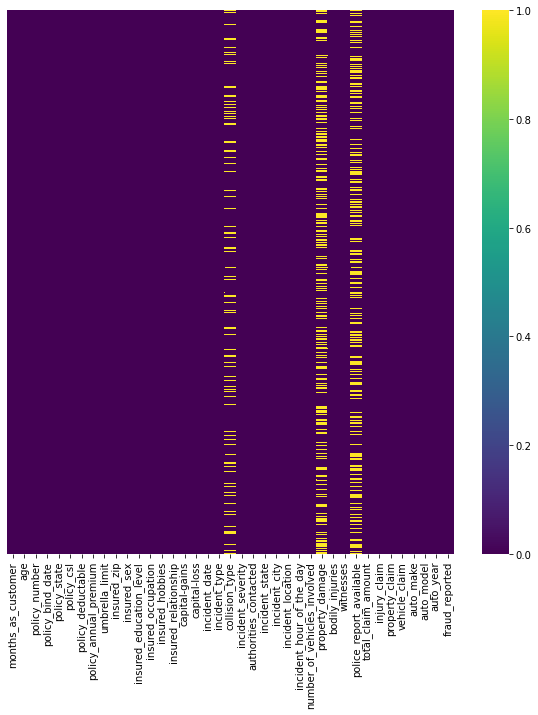

In [11]:
# Finding the Missing values
plt.figure(figsize=(10,10))
sns.heatmap(Insurancemain_pre.isnull(),yticklabels=False,cmap='viridis')

In [12]:
#Checkinf for Missing Values
Insurancemain_pre.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [13]:
# UDF Function to drop the Columns
def dropp(df,t_col):
    df.drop(t_col,axis=1,inplace=True)
    pass

cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']
for i in cols_to_drop:
    dropp(Insurancemain_pre,i)
    print(f'Dropped Column : {i}')

Dropped Column : policy_number
Dropped Column : policy_bind_date
Dropped Column : policy_state
Dropped Column : insured_zip
Dropped Column : incident_location
Dropped Column : incident_date
Dropped Column : incident_state
Dropped Column : incident_city
Dropped Column : insured_hobbies
Dropped Column : auto_make
Dropped Column : auto_model
Dropped Column : auto_year


In [14]:
Insurancemain_pre.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,8,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,NaN,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [15]:
# imputing the missing values from the column

Insurancemain_pre['collision_type']=imputer.fit_transform(Insurancemain_pre['collision_type'])
Insurancemain_pre['property_damage']=imputer.fit_transform(Insurancemain_pre['property_damage'])
Insurancemain_pre['police_report_available']=imputer.fit_transform(Insurancemain_pre['police_report_available'])

In [16]:
Insurancemain_pre.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [17]:
Insurancemain_pre.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [18]:
# Extracting the categorical columns
cat_df = Insurancemain_pre.select_dtypes(include=['object']).copy()

In [19]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [20]:
colnames = ['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available']

for i in colnames:
    print('\nCrossTab for:',i)
    ct1 = pd.crosstab(cat_df[i],cat_df['fraud_reported'])
    print(ct1)


CrossTab for: policy_csl
fraud_reported    N   Y
policy_csl             
100/300         259  90
250/500         259  92
500/1000        235  65

CrossTab for: insured_sex
fraud_reported    N    Y
insured_sex             
FEMALE          411  126
MALE            342  121

CrossTab for: insured_education_level
fraud_reported             N   Y
insured_education_level         
Associate                111  34
College                   90  32
High School              124  36
JD                       119  42
MD                       106  38
Masters                  111  32
PhD                       92  33

CrossTab for: insured_occupation
fraud_reported       N   Y
insured_occupation        
adm-clerical        54  11
armed-forces        52  17
craft-repair        52  22
exec-managerial     48  28
farming-fishing     37  16
handlers-cleaners   43  11
machine-op-inspct   71  22
other-service       59  12
priv-house-serv     59  12
prof-specialty      67  18
protective-serv     49  14
sales 

In [21]:
# checking for association of predictor varibales with the target varibale
colnames = ['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim']

from scipy.stats import chi2_contingency
for i in colnames:
    chi2, p, dof, expected = chi2_contingency((pd.crosstab(Insurancemain_pre[i],Insurancemain_pre['fraud_reported']).values))
    print('\nTest Statistics for:',i)
    print (f'Chi-square Statistic : {chi2} ,p-value: {p}')
    # Determine whether to reject or keep your null hypothesis
    alpha = 0.05
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Variables are associated (reject H0)')
    else:
        print('Variables are not associated(fail to reject H0)')


Test Statistics for: months_as_customer
Chi-square Statistic : 419.68518189948253 ,p-value: 0.1443914857895284
significance=0.050, p=0.144
Variables are not associated(fail to reject H0)

Test Statistics for: age
Chi-square Statistic : 50.828585118230194 ,p-value: 0.2548448612620797
significance=0.050, p=0.255
Variables are not associated(fail to reject H0)

Test Statistics for: policy_csl
Chi-square Statistic : 2.1369985737735036 ,p-value: 0.3435236612436183
significance=0.050, p=0.344
Variables are not associated(fail to reject H0)

Test Statistics for: policy_deductable
Chi-square Statistic : 1.4760995579420264 ,p-value: 0.47804530102090015
significance=0.050, p=0.478
Variables are not associated(fail to reject H0)

Test Statistics for: policy_annual_premium
Chi-square Statistic : 991.9350936335627 ,p-value: 0.47669899648026187
significance=0.050, p=0.477
Variables are not associated(fail to reject H0)

Test Statistics for: umbrella_limit
Chi-square Statistic : 10.140931990344878 ,

In [22]:
Insurancemain_pre.dtypes

months_as_customer               int64
age                              int64
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim            

In [23]:
num_df = Insurancemain_pre.select_dtypes(include=['int64','float64']).copy()
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [24]:
cat_df_columns = ['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported']

def label_encoding(df,t_col):
        LaEn = LabelEncoder()
        df[t_col] = LaEn.fit_transform(df[t_col])
        pass

for i in cat_df_columns:
    label_encoding(cat_df,i)
    print(f"Succesfully completed Label Encoding for {i} Variable")

Succesfully completed Label Encoding for policy_csl Variable
Succesfully completed Label Encoding for insured_sex Variable
Succesfully completed Label Encoding for insured_education_level Variable
Succesfully completed Label Encoding for insured_occupation Variable
Succesfully completed Label Encoding for insured_relationship Variable
Succesfully completed Label Encoding for incident_type Variable
Succesfully completed Label Encoding for collision_type Variable
Succesfully completed Label Encoding for incident_severity Variable
Succesfully completed Label Encoding for authorities_contacted Variable
Succesfully completed Label Encoding for property_damage Variable
Succesfully completed Label Encoding for police_report_available Variable
Succesfully completed Label Encoding for fraud_reported Variable


In [25]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df], axis=1)

In [26]:
# separating the feature and target columns
x=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

In [27]:
# splitting the data for model training

# splitting the data into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355)

In [28]:
print(f"The Row of train_x is : {train_x.shape[0]} and the Column of train_x is : {train_x.shape[1]}")
print(f"The Row of test_x is : {test_x.shape[0]} and the Column of train_x is : {test_x.shape[1]}")
print(f"The Row of train_y is : {train_y.shape} and the Column of train_y is : {train_y.shape}")
print(f"The Row of test_y is : {test_y.shape} and the Column of train_y is : {test_y.shape}")

The Row of train_x is : 750 and the Column of train_x is : 26
The Row of test_x is : 250 and the Column of train_x is : 26
The Row of train_y is : (750,) and the Column of train_y is : (750,)
The Row of test_y is : (250,) and the Column of train_y is : (250,)


In [29]:
train_x.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
65,254,39,500,1362.87,0,35700,0,6,3,2,2,82320,13720,6860,61740,0,0,4,3,2,0,0,1,0,1,0
244,95,28,1000,773.99,0,0,-70300,3,1,1,2,3200,640,320,2240,1,1,0,1,2,3,1,3,2,1,0
595,56,36,500,1533.07,0,0,-28800,13,1,1,2,58500,0,6500,52000,0,1,3,4,3,2,1,0,4,1,1
873,322,49,2000,1277.12,0,0,-46000,18,1,0,2,42240,7680,7680,26880,1,0,6,1,3,2,1,0,0,0,1
631,147,37,1000,1439.90,6000000,0,-48400,2,2,1,2,53680,9760,4880,39040,2,0,0,9,0,0,1,2,3,0,0


In [30]:
#Checking for the Percentage of co-relation with dependent variable.
def corr_with_target(df,t_col):
    independent_variables = df.drop(t_col,axis=1).columns
    corr_result=[]
    for col in independent_variables:
        corr_result.append(df[t_col].corr(df[col]))
    result = pd.DataFrame([independent_variables,corr_result],index=['Independent variables','Correlation']).T
    return result.sort_values('Correlation')
corr_with_target(final_df,'fraud_reported')

,Independent variables,Correlation
22,incident_severity,-0.405988
20,incident_type,-0.050376
23,authorities_contacted,-0.045802
15,policy_csl,-0.03719
25,police_report_available,-0.027768
5,capital-gains,-0.019173
21,collision_type,-0.017315
6,capital-loss,-0.014863
3,policy_annual_premium,-0.01448
18,insured_occupation,0.001564


In [31]:
def describe(my_df):

    #creating an empty list for columns and appending everything into that
    cols=[]
    for i in my_df.columns:
        if my_df[i].dtype != object:
            cols.append(i)


    #Now we are describing which needs to be set as columns and what needs to be set as index in Dataframe
    result = pd.DataFrame(columns= cols,index= ['DataType','Count','Min', 'Q1', 'Q2', 'Mean', 'Q3', 'Max', 'Std','Skew','Kurt','Range','IQR','Skewness comment','Outlier comment','Kurtosis comment'])

    for i in result.columns:
        result.loc['DataType',i] = my_df[i].dtype
        result.loc['Count',i] = my_df[i].count()
        result.loc['Min',i] = my_df[i].min()
        result.loc['Q1',i] = my_df[i].quantile(0.25)
        result.loc['Q2',i] = my_df[i].quantile(0.5)
        result.loc['Mean',i] = round(my_df[i].mean(),2)
        result.loc['Q3',i] = my_df[i].quantile(0.75)
        result.loc['Max',i] = my_df[i].max()
        result.loc['Std',i] = round(my_df[i].std(),2)
        result.loc['Skew',i] = round(my_df[i].skew(),2)
        result.loc['Kurt',i] = round(my_df[i].kurt(),2)
        result.loc['Range',i] = my_df[i].max() - my_df[i].min()
        result.loc['IQR',i] = my_df[i].quantile(0.75) - my_df[i].quantile(0.25)

        #Adding comments for skewness
        if result.loc['Skew',i] <= -1:
            sk_label = "Highly negatively skewed"
        elif -1 < result.loc['Skew',i] <= -0.5:
            sk_label = "Moderately negatively skewed"
        elif -0.5 < result.loc['Skew',i] < 0:
            sk_label = "Approx normal distribution(-ve)"
        elif 0 <= result.loc['Skew',i] < 0.5:
            sk_label = "Approx normal distribution(+ve)"
        elif 0.5 <= result.loc['Skew',i] < 1:
            sk_label = "Moderately positively skewed"
        elif result.loc['Skew',i] >= 1:
            sk_label = "Highly positively skewed"
        else:
            sk_label = 'Error'
        result.loc['Skewness comment', i] = sk_label

    # Adding comments for outliers
        upperlimit = result.loc['Q3',i] + (1.5 * result.loc['IQR',i])
        lowerlimit = result.loc['Q1',i] - (1.5 * result.loc['IQR',i])

        if len([x for x in my_df[i] if x < lowerlimit or x > upperlimit]) > 0:
            outlier_label = "Have outliers"
        else:
            outlier_label = "No outliers"
        result.loc['Outlier comment', i] = outlier_label

    # Adding kurtosis comment
        if result.loc['Kurt',i] <= -1:
            kt_label = "Highly platykurtic curve"
        elif -1 < result.loc['Kurt',i] <= -0.5:
            kt_label = "Moderately platykurtic curve"
        elif -0.5 < result.loc['Kurt',i] < 0.5:
            kt_label = "Mezokurtic curve"
        elif 0.5 <= result.loc['Kurt',i] < 1:
            kt_label = "Moderately leptokurtic curve"
        elif result.loc['Kurt',i] >= 1:
            kt_label = "Highly leptokurtic curve"
        else:
            kt_label = 'Error'
        result.loc['Kurtosis comment', i] = kt_label
    display(result)
    
describe(final_df)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
DataType,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32
Count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Min,0,19,500,433.33,-1000000,0,-111100,0,1,0,0,100,0,0,70,0,0,0,0,0,0,0,0,0,0,0,0
Q1,115.75,32.0,500.0,1089.6075,0.0,0.0,-51500.0,6.0,1.0,0.0,1.0,41812.5,4295.0,4445.0,30292.5,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Q2,199.5,38.0,1000.0,1257.2,0.0,0.0,-23250.0,12.0,1.0,1.0,1.0,58055.0,6775.0,6750.0,42100.0,1.0,0.0,3.0,7.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0
Mean,203.95,38.95,1136.0,1256.41,1101000.0,25126.1,-26793.7,11.64,1.84,0.99,1.49,52761.94,7433.42,7399.57,37928.95,0.95,0.46,2.97,6.65,2.42,1.17,1.02,1.18,2.17,0.3,0.31,0.25
Q3,276.25,44.0,2000.0,1415.695,0.0,51025.0,0.0,17.0,3.0,2.0,2.0,70592.5,11305.0,10885.0,50822.5,2.0,1.0,5.0,10.0,4.0,2.0,2.0,2.0,4.0,1.0,1.0,0.0
Max,479,64,2000,2047.59,10000000,100500,0,23,4,2,3,114920,21450,23670,79560,2,1,6,13,5,3,2,3,4,1,1,1
Std,115.11,9.14,611.86,244.17,2297406.6,27872.19,28104.1,6.95,1.02,0.82,1.11,26401.53,4880.95,4824.73,18886.25,0.8,0.5,1.95,4.02,1.68,1.08,0.73,0.94,1.53,0.46,0.46,0.43
Skew,0.36,0.48,0.48,0.0,1.81,0.48,-0.39,-0.04,0.5,0.01,0.02,-0.59,0.26,0.38,-0.62,0.09,0.15,-0.0,-0.06,0.08,0.1,-0.03,0.28,-0.12,0.86,0.8,1.18


C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

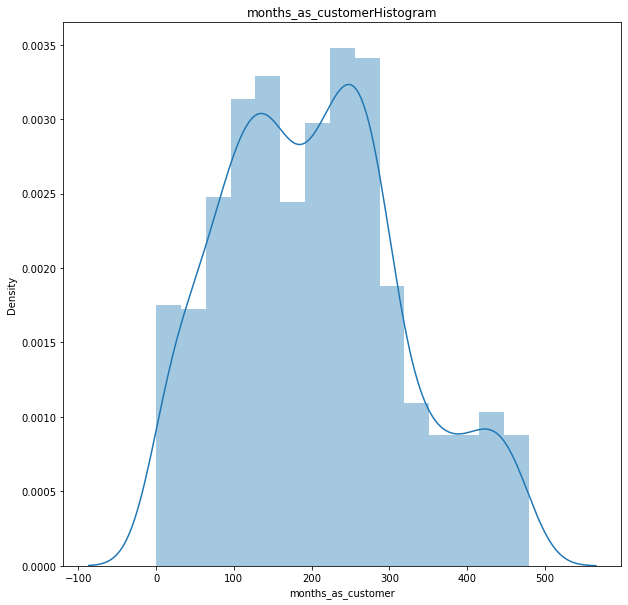

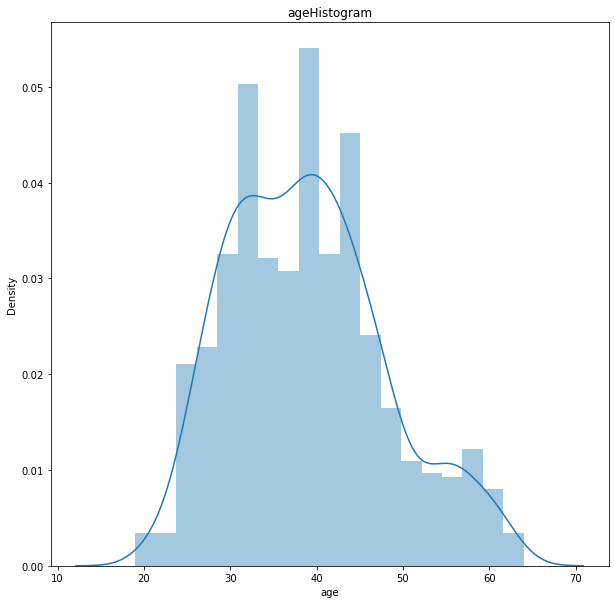

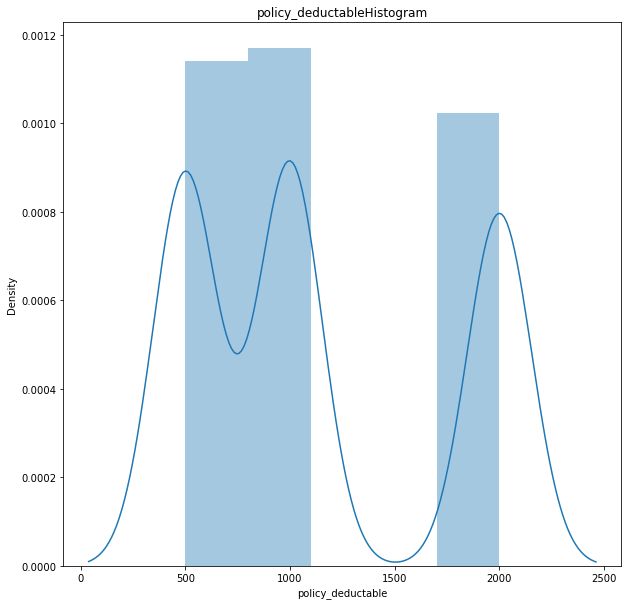

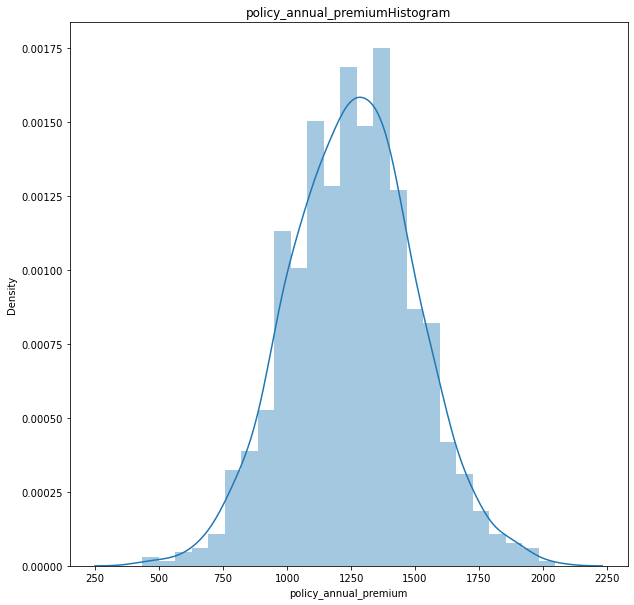

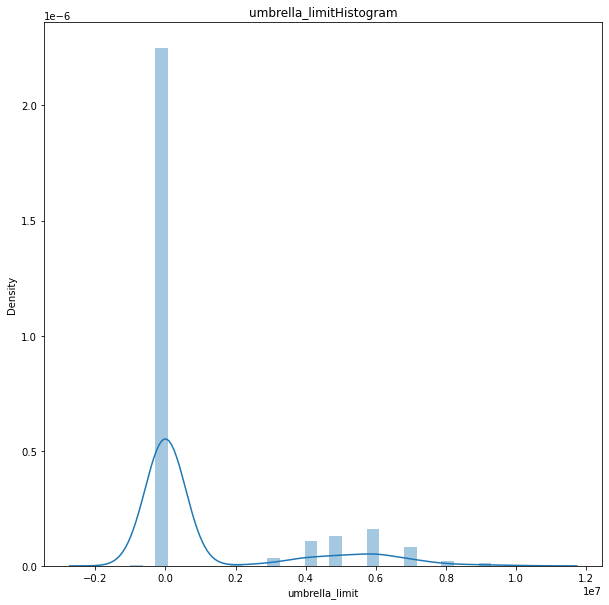

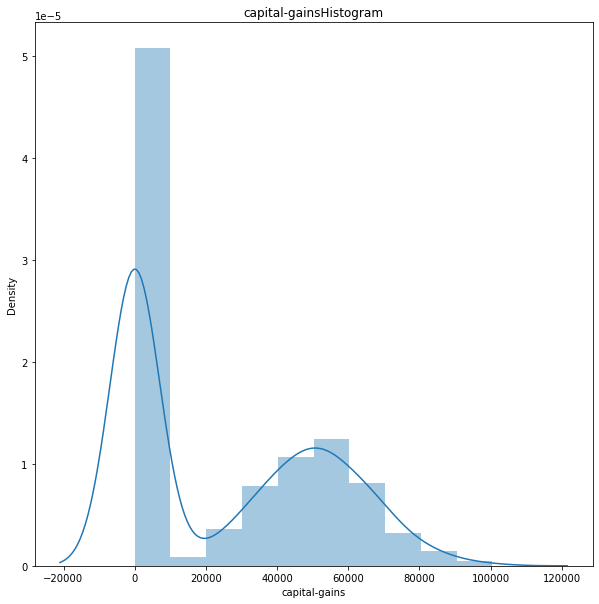

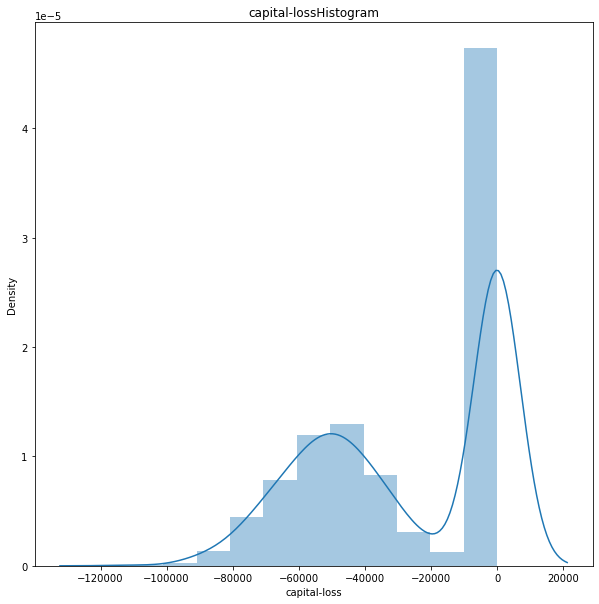

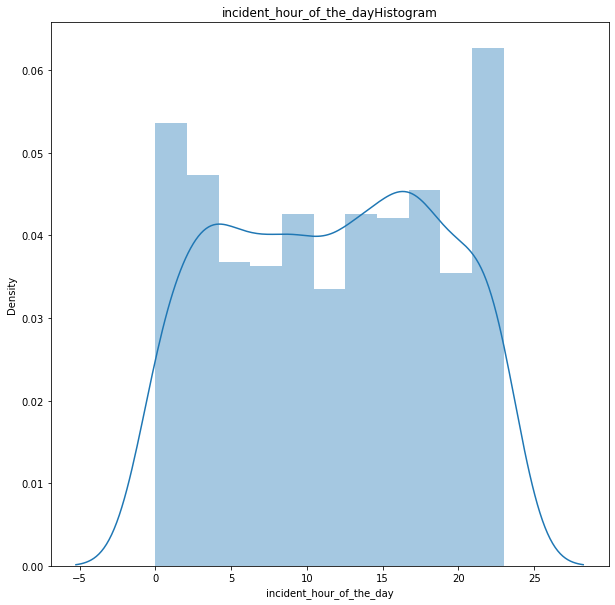

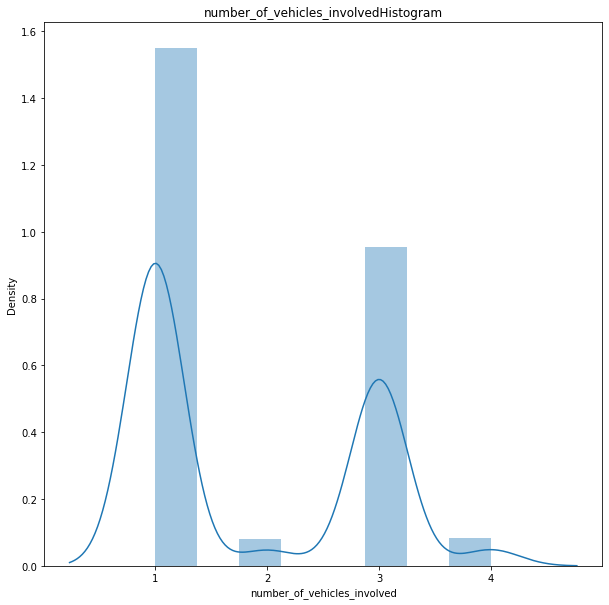

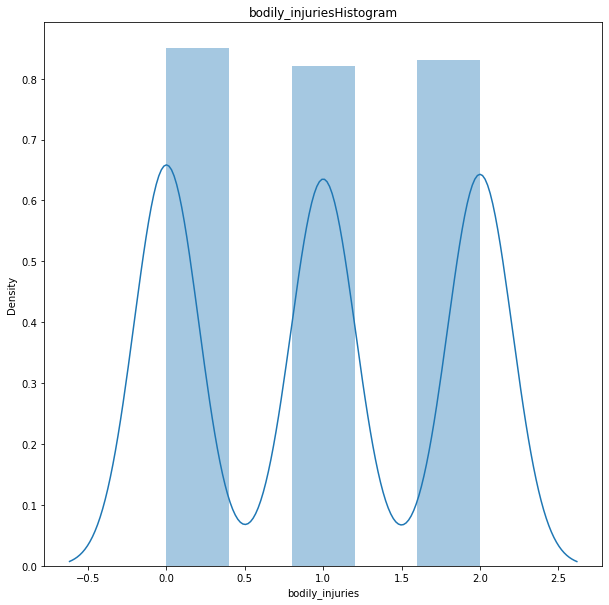

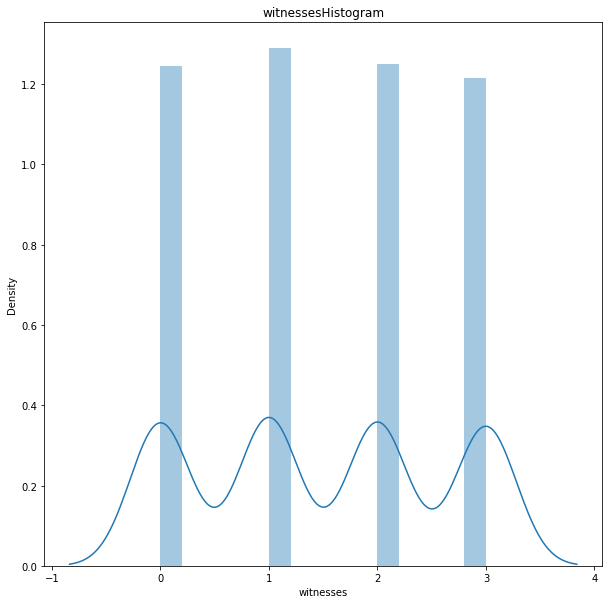

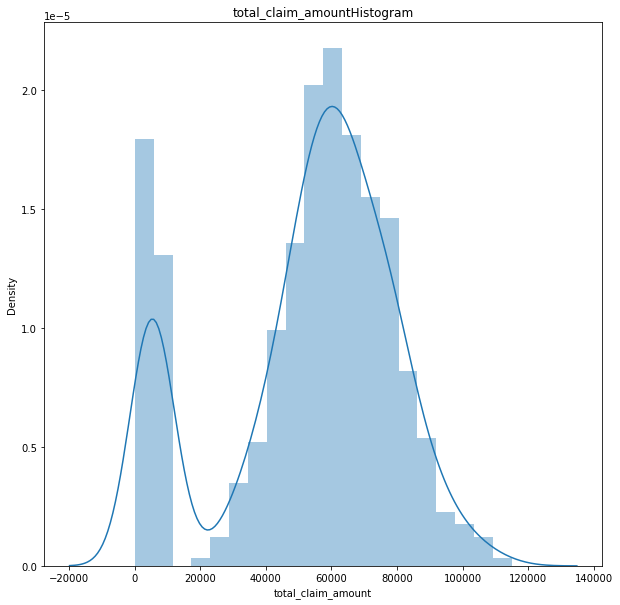

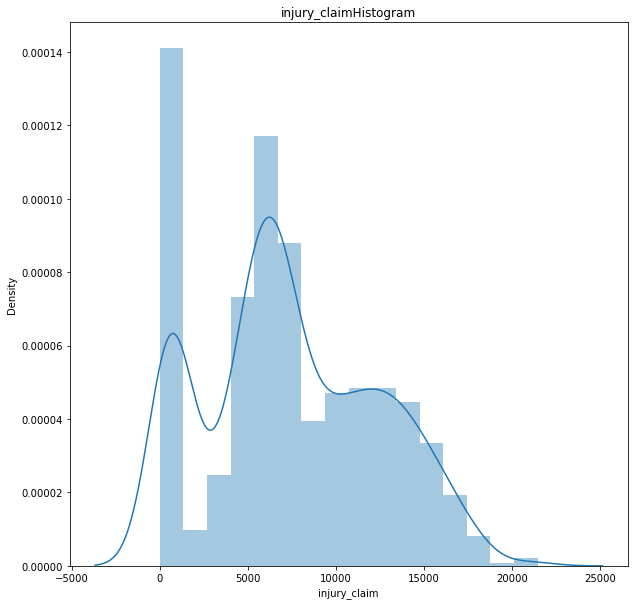

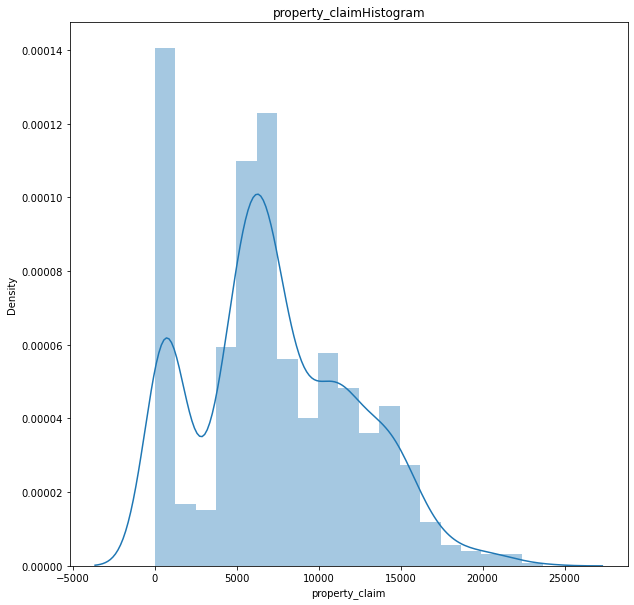

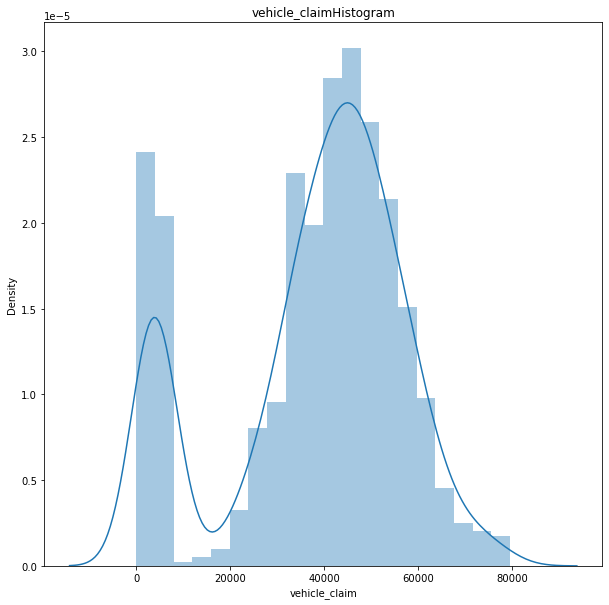

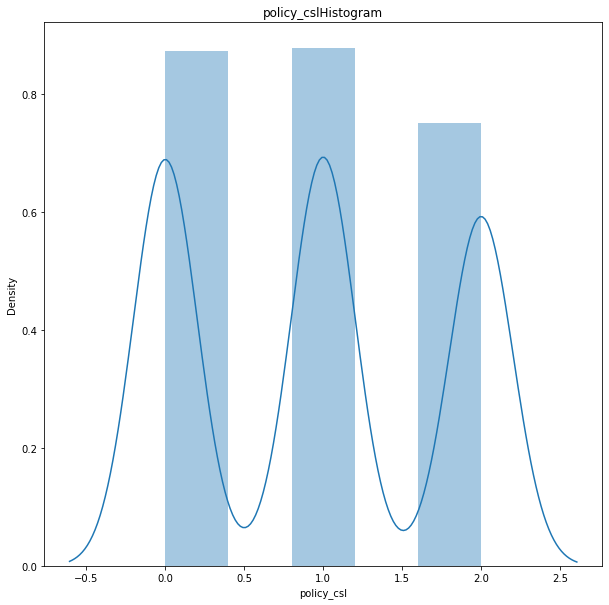

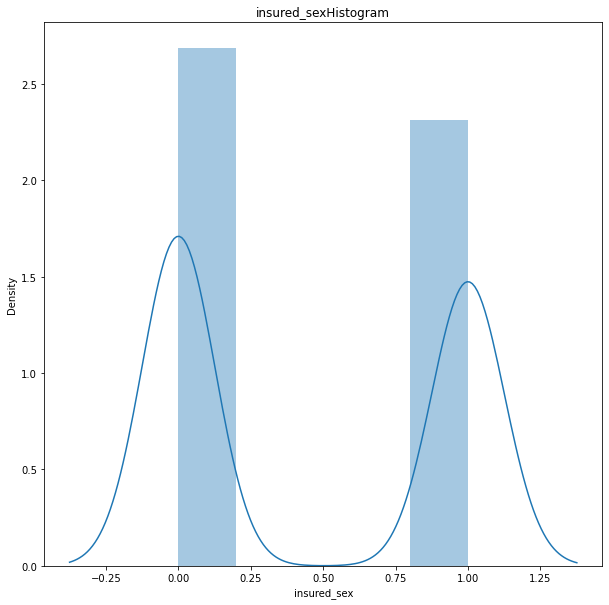

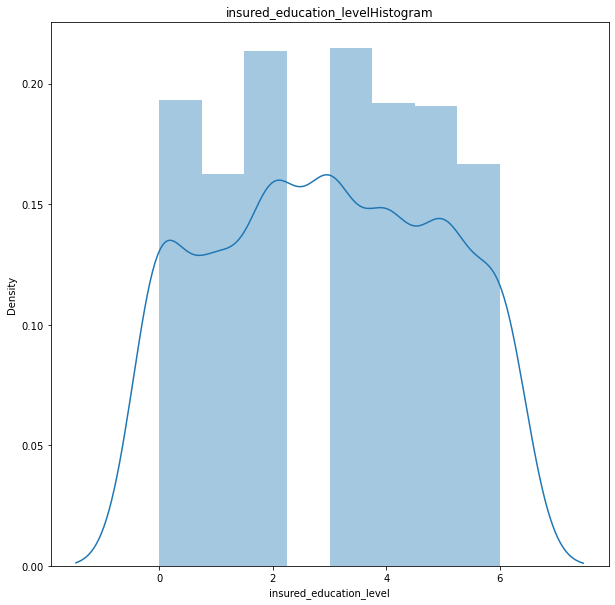

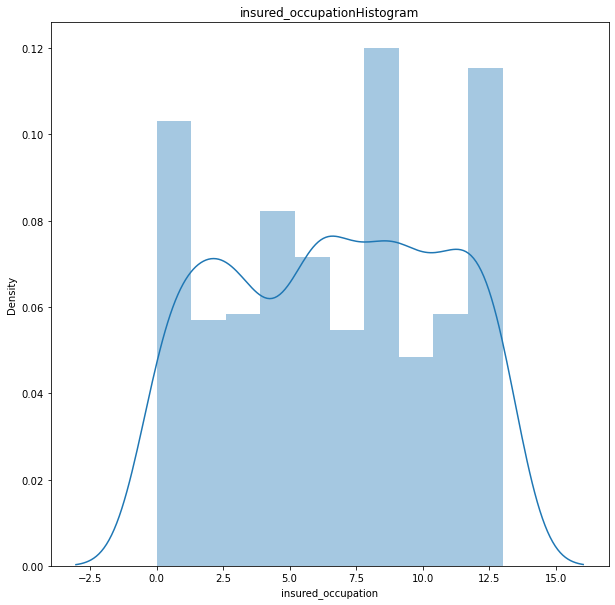

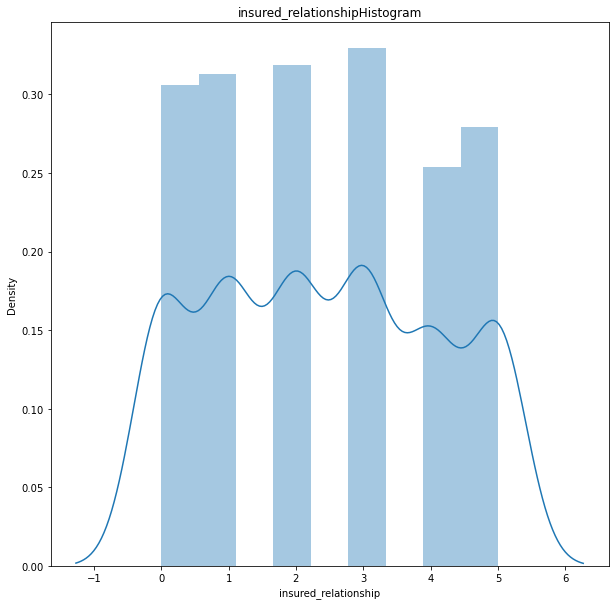

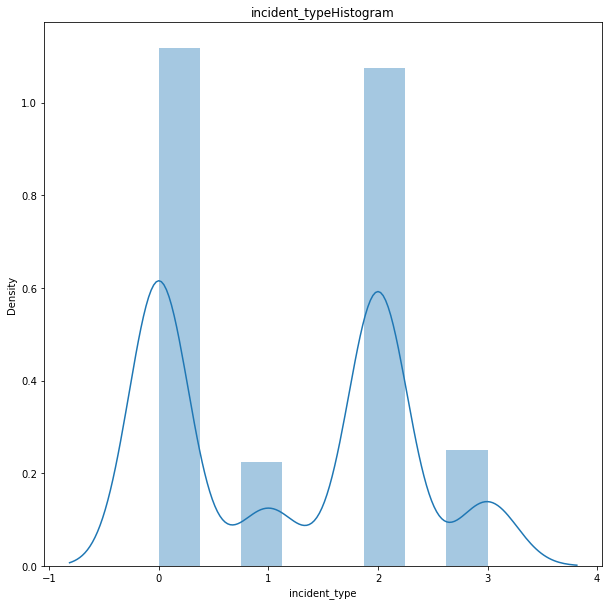

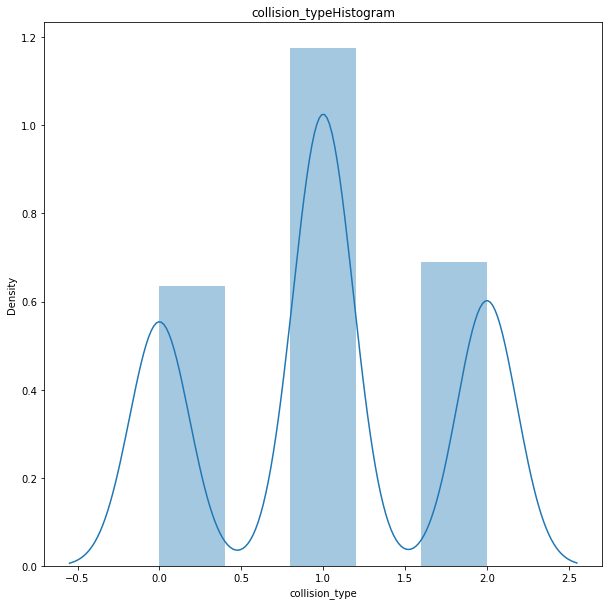

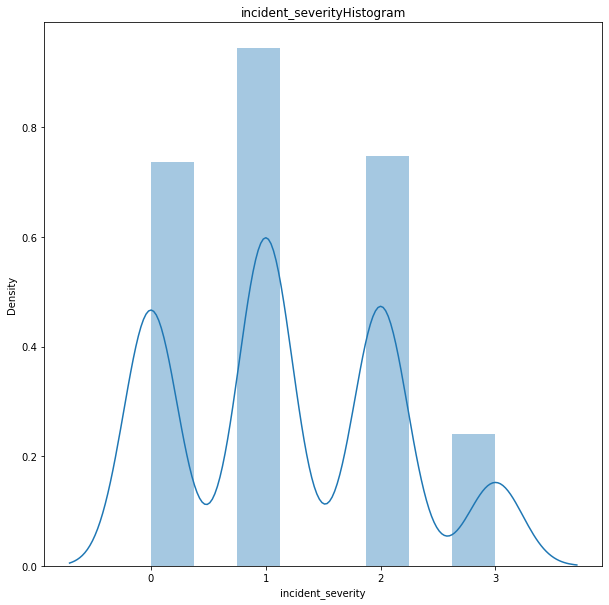

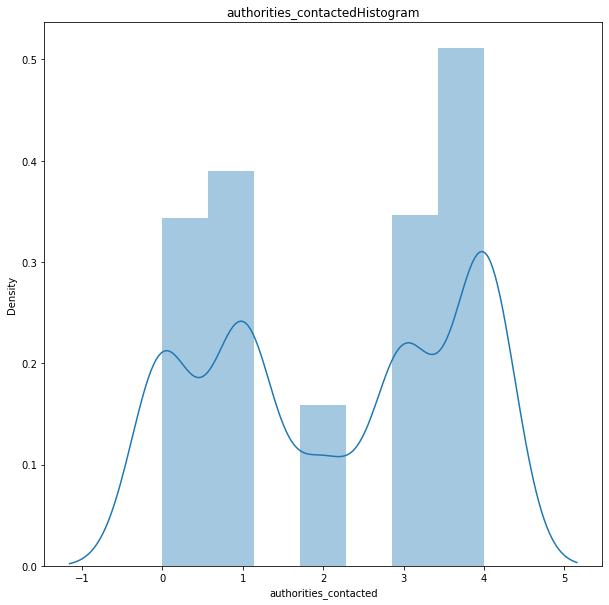

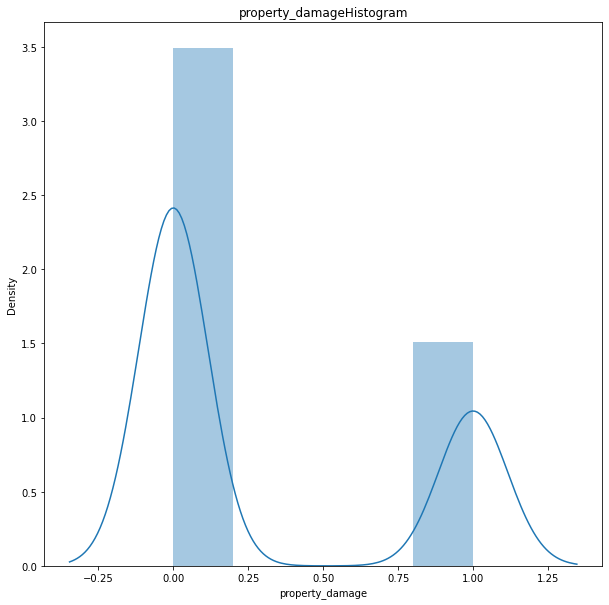

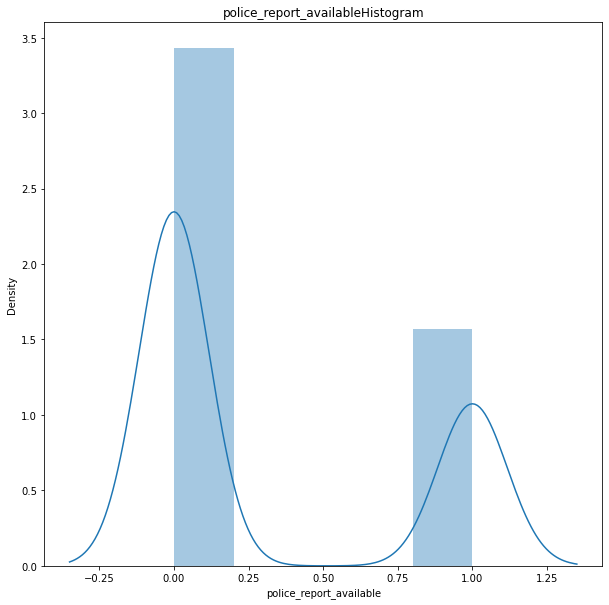

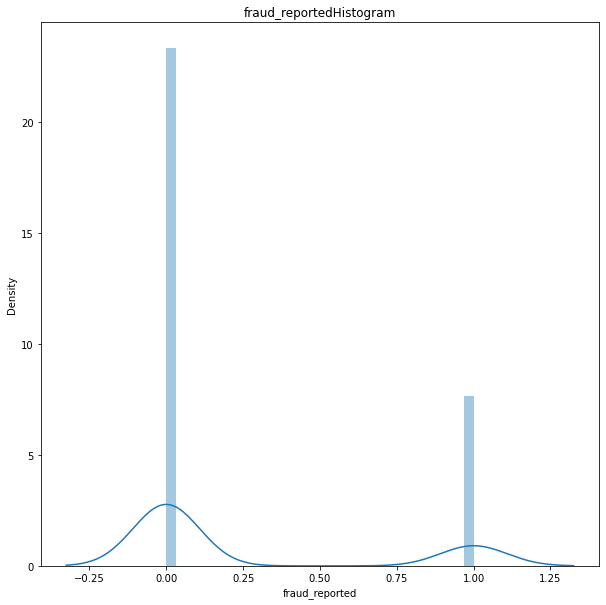

In [32]:
def histogram(df):
    for col in df.columns:
        if col!='Aggregate rating':
            plt.figure(figsize=(10,10))
            sns.distplot(df[col]).set_title(f'{col}Histogram')
histogram(final_df)

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\li

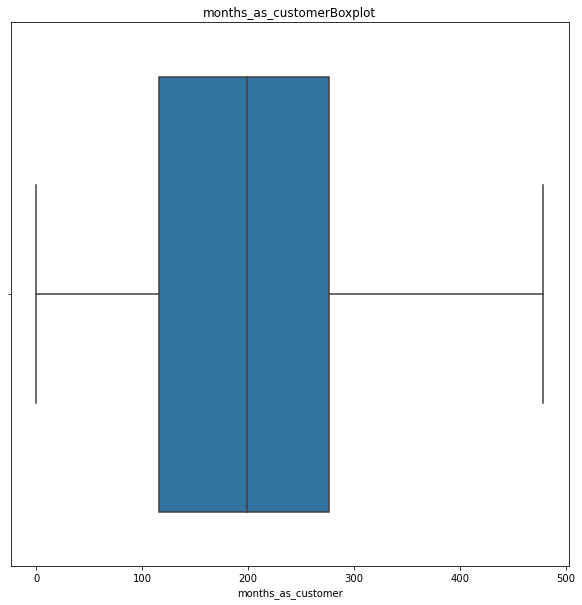

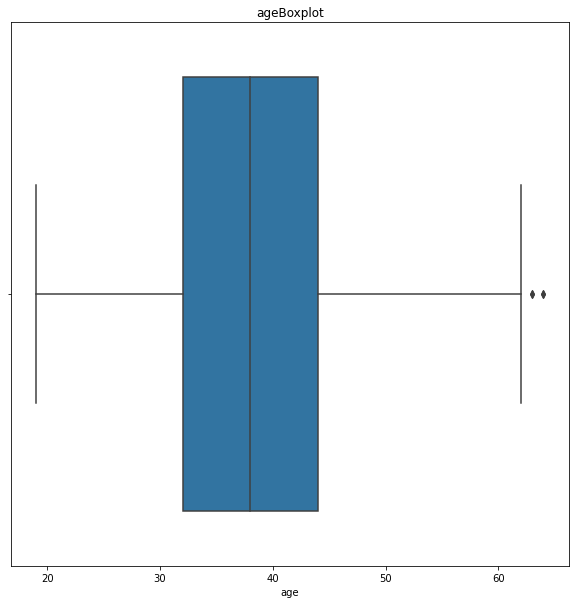

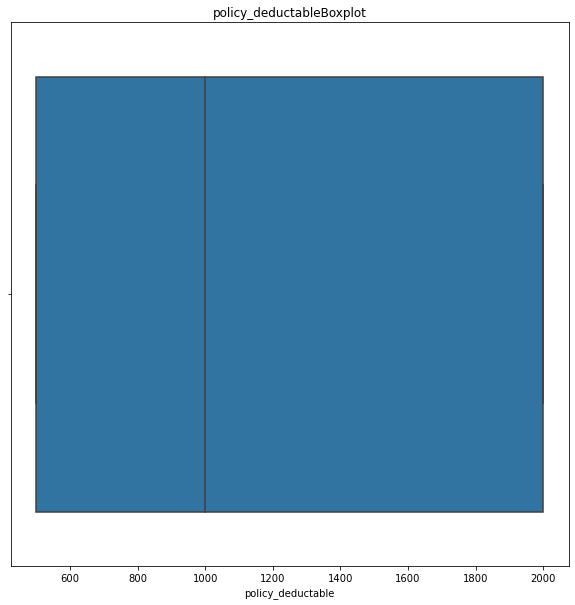

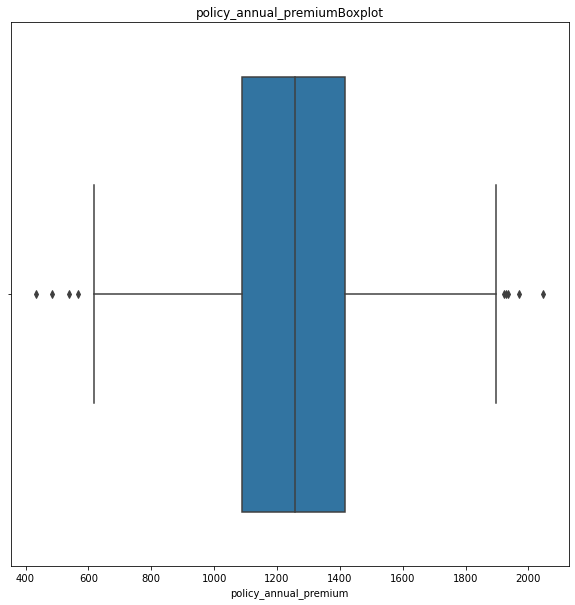

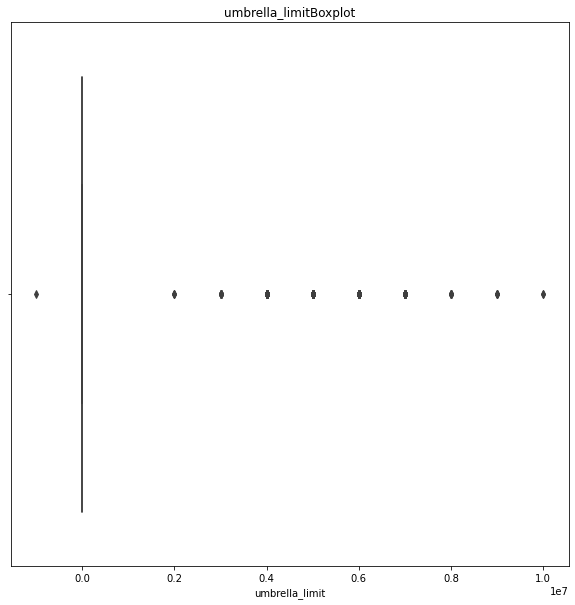

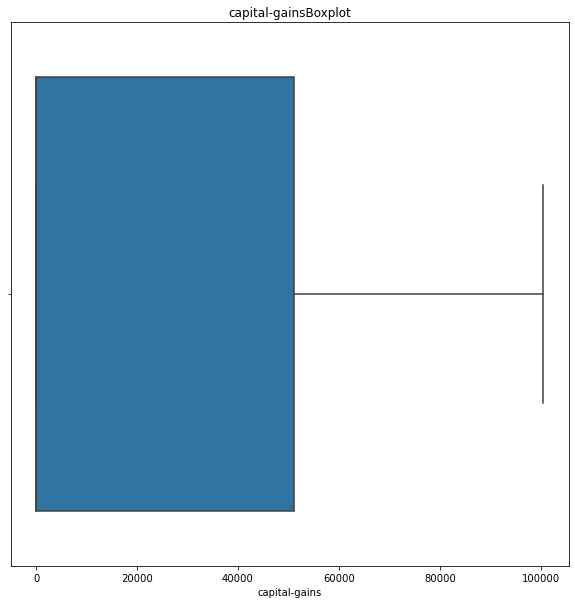

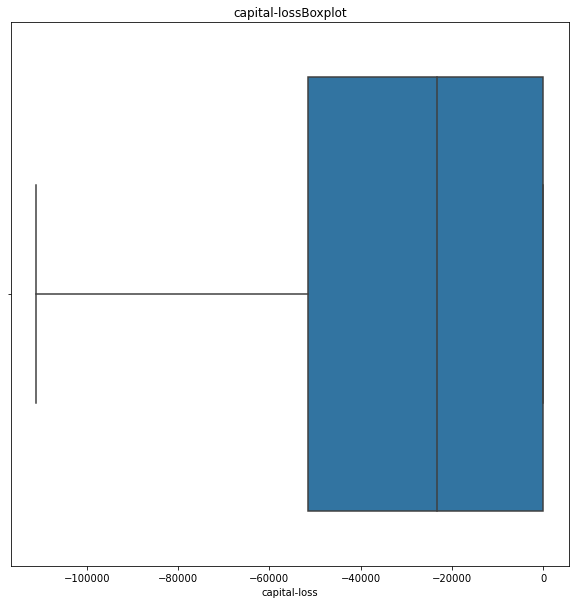

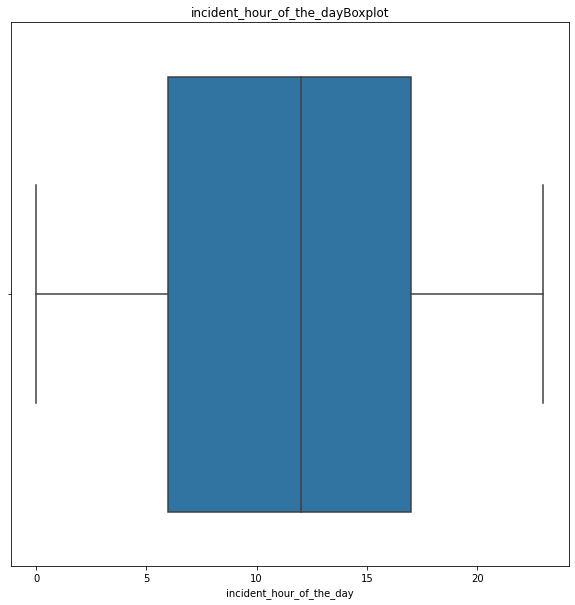

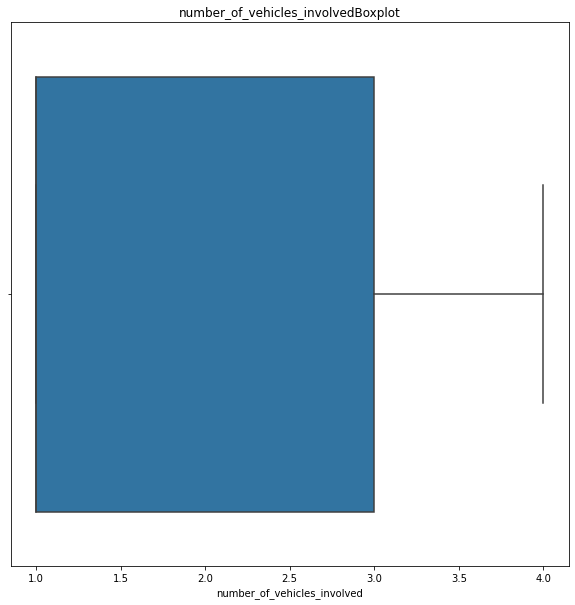

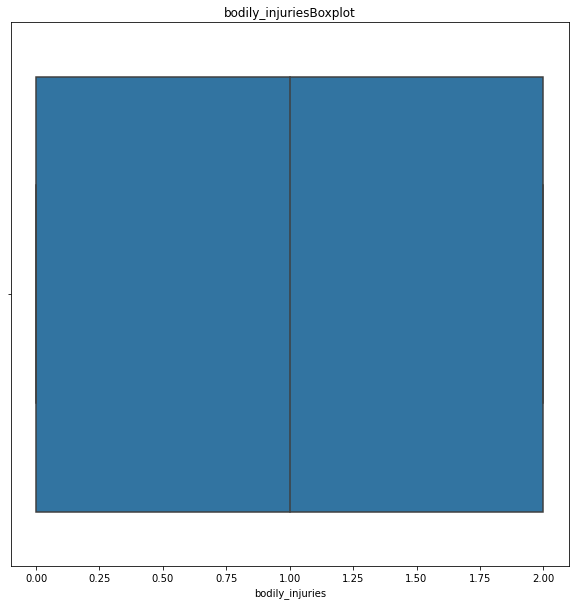

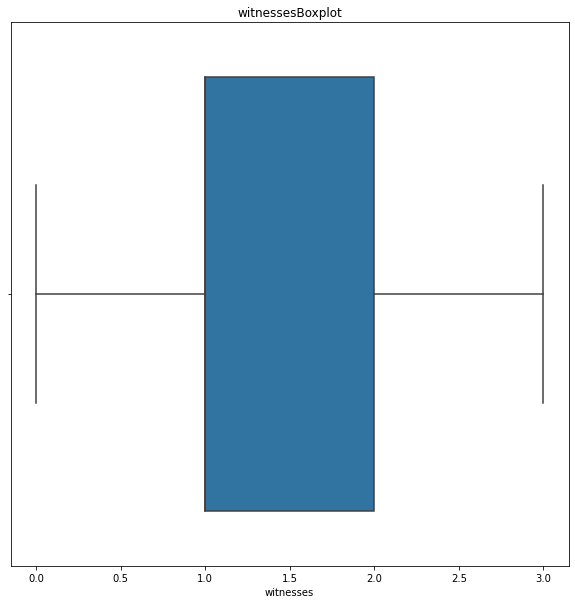

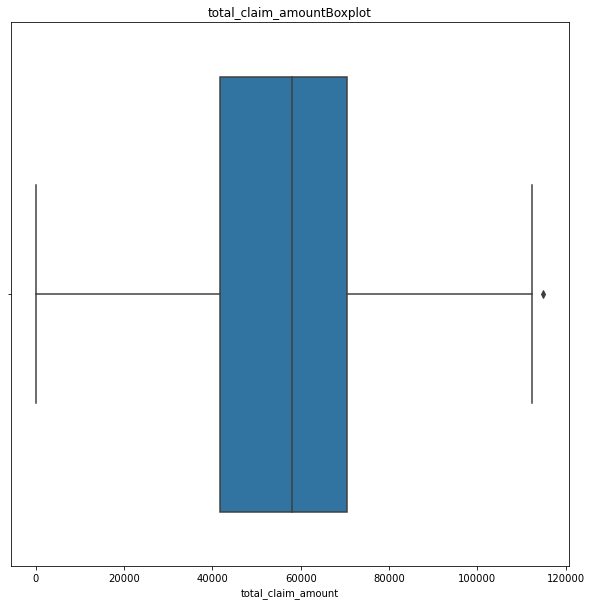

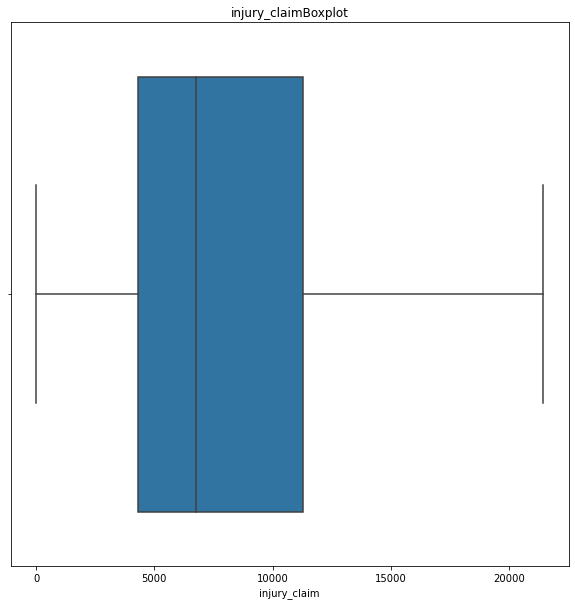

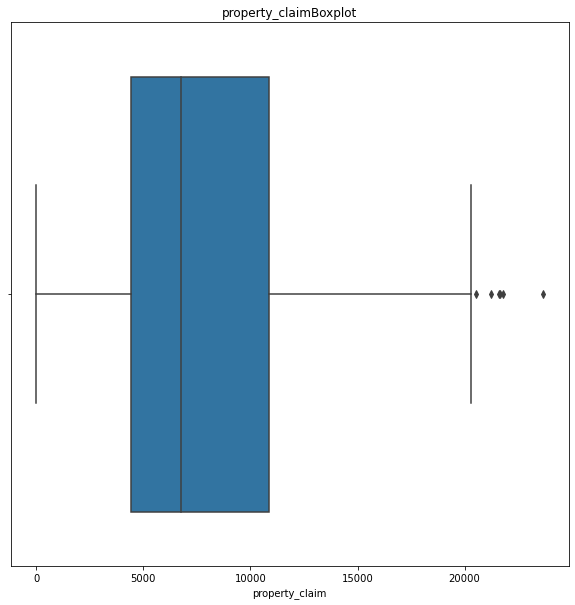

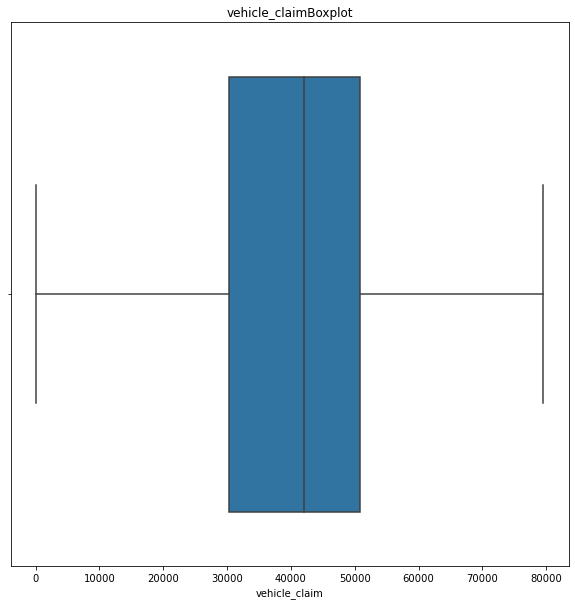

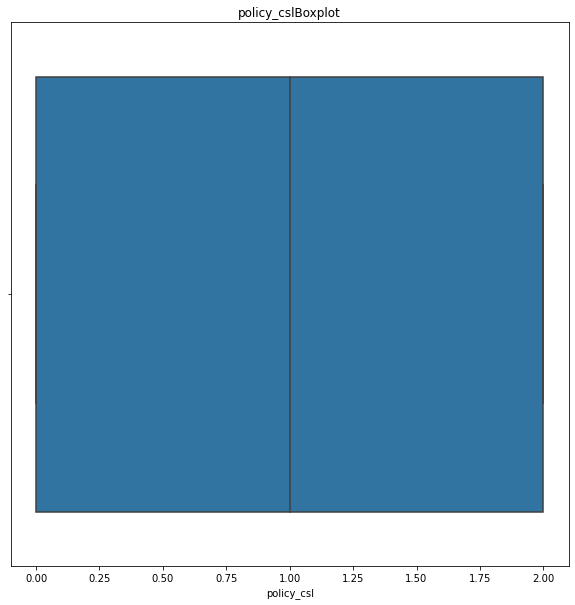

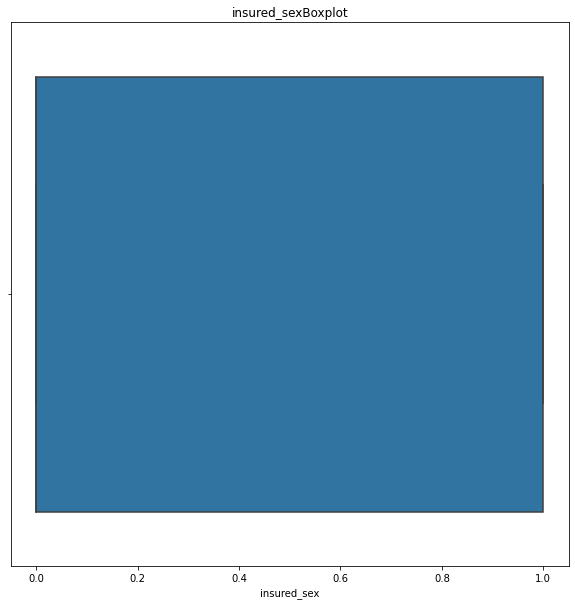

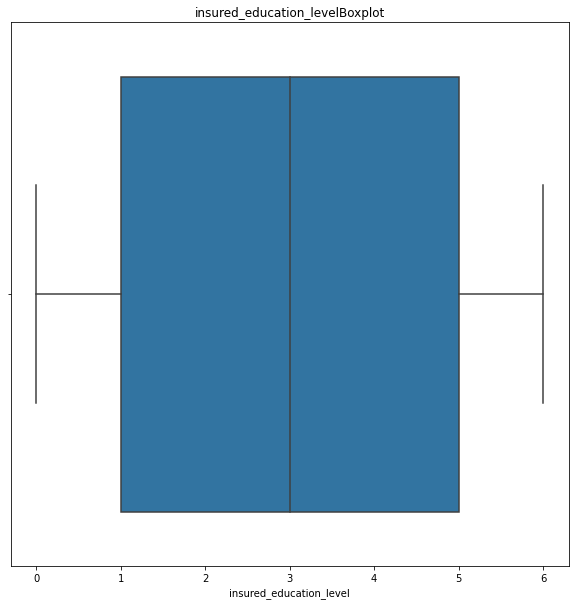

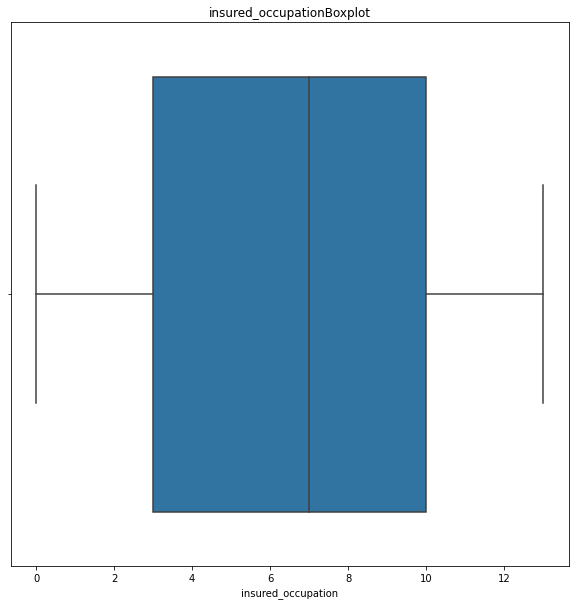

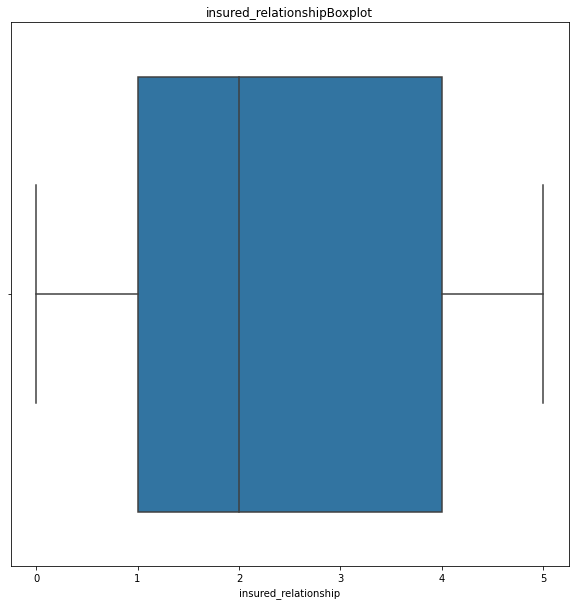

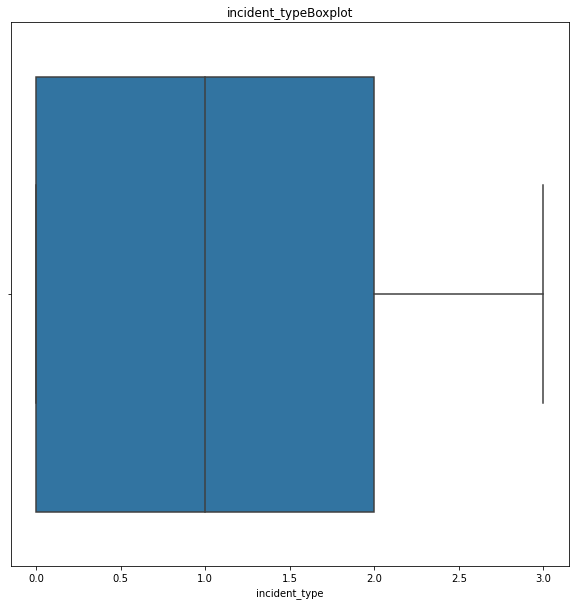

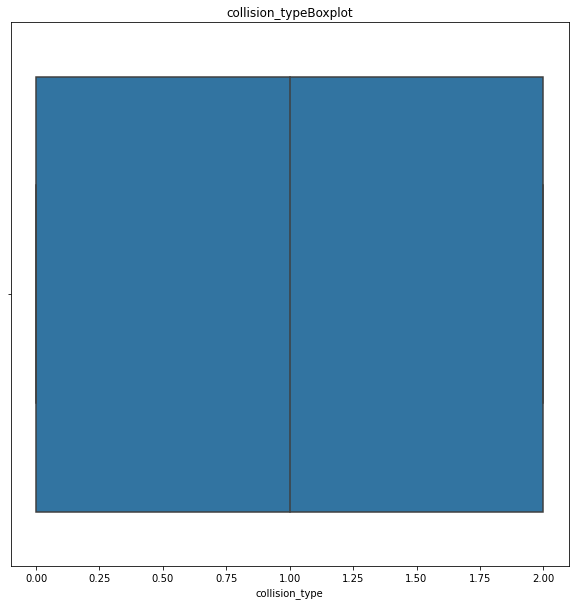

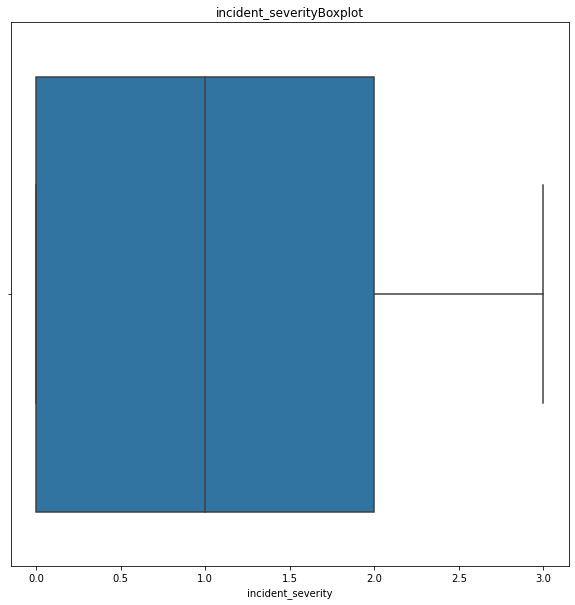

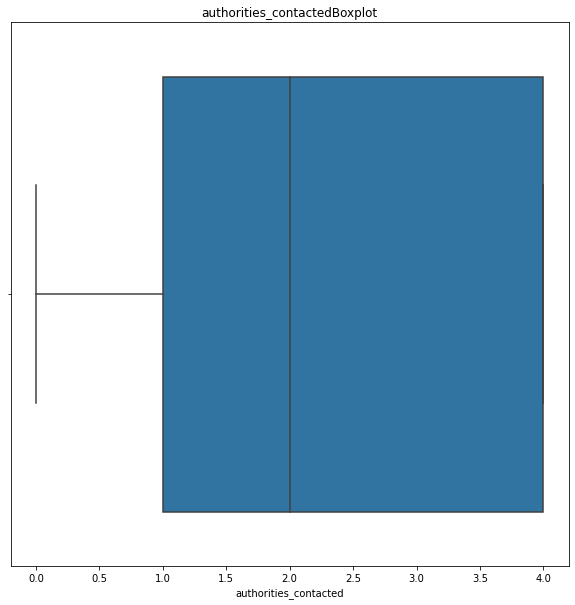

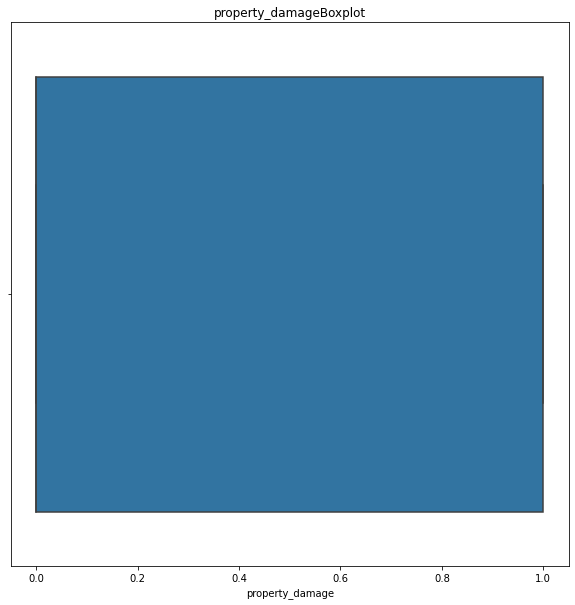

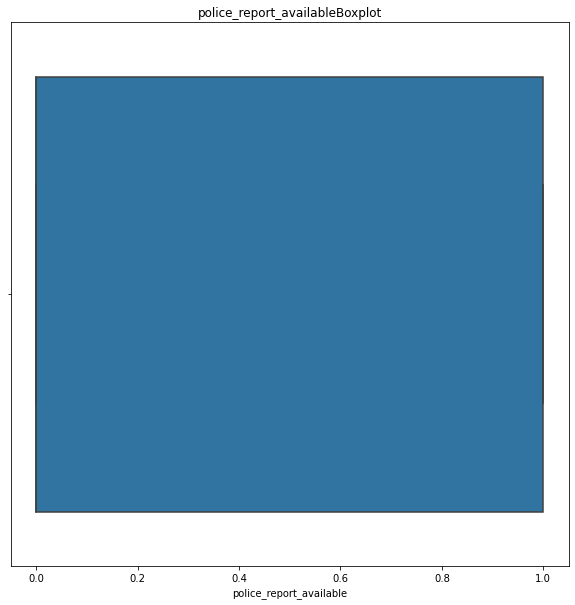

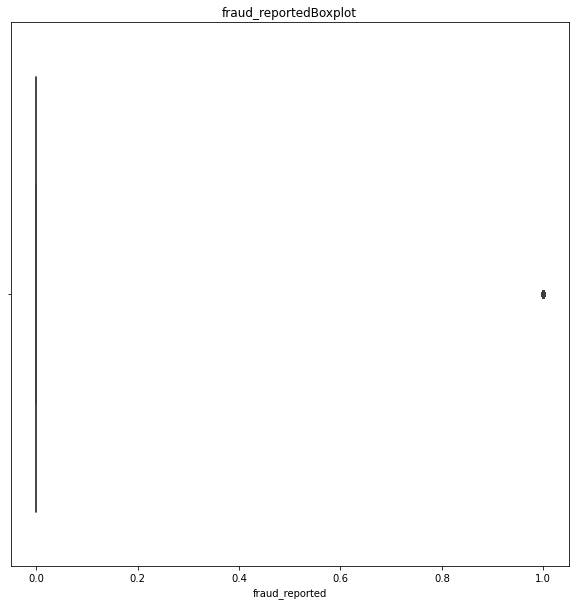

In [33]:
def Boxplot(df):
    for col in df.columns:
        if col!='Aggregate rating':
            plt.figure(figsize=(10,10))
            sns.boxplot(df[col]).set_title(f'{col}Boxplot')
Boxplot(final_df)

In [34]:
#Treating skewness using Transformation techniques
data_new_log = final_df.copy()
data_new_log10 = final_df.copy()
data_new_sqrt = final_df.copy()
data_new_cbrt = final_df.copy()
data_new_poly = final_df.copy()

trans_log = ['umbrella_limit']

def cbrt(df,t_col):
    df[t_col]= np.cbrt(df[t_col]) 
    pass

cbrt(data_new_cbrt,'umbrella_limit')

In [35]:
def describe(my_df):

    #creating an empty list for columns and appending everything into that
    cols=[]
    for i in my_df.columns:
        if my_df[i].dtype != object:
            cols.append(i)


    #Now we are describing which needs to be set as columns and what needs to be set as index in Dataframe
    result = pd.DataFrame(columns= cols,index= ['DataType','Count','Min', 'Q1', 'Q2', 'Mean', 'Q3', 'Max', 'Std','Skew','Kurt','Range','IQR','Skewness comment','Outlier comment','Kurtosis comment'])

    for i in result.columns:
        result.loc['DataType',i] = my_df[i].dtype
        result.loc['Count',i] = my_df[i].count()
        result.loc['Min',i] = my_df[i].min()
        result.loc['Q1',i] = my_df[i].quantile(0.25)
        result.loc['Q2',i] = my_df[i].quantile(0.5)
        result.loc['Mean',i] = round(my_df[i].mean(),2)
        result.loc['Q3',i] = my_df[i].quantile(0.75)
        result.loc['Max',i] = my_df[i].max()
        result.loc['Std',i] = round(my_df[i].std(),2)
        result.loc['Skew',i] = round(my_df[i].skew(),2)
        result.loc['Kurt',i] = round(my_df[i].kurt(),2)
        result.loc['Range',i] = my_df[i].max() - my_df[i].min()
        result.loc['IQR',i] = my_df[i].quantile(0.75) - my_df[i].quantile(0.25)

        #Adding comments for skewness
        if result.loc['Skew',i] <= -1:
            sk_label = "Highly negatively skewed"
        elif -1 < result.loc['Skew',i] <= -0.5:
            sk_label = "Moderately negatively skewed"
        elif -0.5 < result.loc['Skew',i] < 0:
            sk_label = "Approx normal distribution(-ve)"
        elif 0 <= result.loc['Skew',i] < 0.5:
            sk_label = "Approx normal distribution(+ve)"
        elif 0.5 <= result.loc['Skew',i] < 1:
            sk_label = "Moderately positively skewed"
        elif result.loc['Skew',i] >= 1:
            sk_label = "Highly positively skewed"
        else:
            sk_label = 'Error'
        result.loc['Skewness comment', i] = sk_label

    # Adding comments for outliers
        upperlimit = result.loc['Q3',i] + (1.5 * result.loc['IQR',i])
        lowerlimit = result.loc['Q1',i] - (1.5 * result.loc['IQR',i])

        if len([x for x in my_df[i] if x < lowerlimit or x > upperlimit]) > 0:
            outlier_label = "Have outliers"
        else:
            outlier_label = "No outliers"
        result.loc['Outlier comment', i] = outlier_label

    # Adding kurtosis comment
        if result.loc['Kurt',i] <= -1:
            kt_label = "Highly platykurtic curve"
        elif -1 < result.loc['Kurt',i] <= -0.5:
            kt_label = "Moderately platykurtic curve"
        elif -0.5 < result.loc['Kurt',i] < 0.5:
            kt_label = "Mezokurtic curve"
        elif 0.5 <= result.loc['Kurt',i] < 1:
            kt_label = "Moderately leptokurtic curve"
        elif result.loc['Kurt',i] >= 1:
            kt_label = "Highly leptokurtic curve"
        else:
            kt_label = 'Error'
        result.loc['Kurtosis comment', i] = kt_label
    display(result)
    
describe(data_new_cbrt)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
DataType,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32
Count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Min,0,19,500,433.33,-100.0,0,-111100,0,1,0,0,100,0,0,70,0,0,0,0,0,0,0,0,0,0,0,0
Q1,115.75,32.0,500.0,1089.6075,0.0,0.0,-51500.0,6.0,1.0,0.0,1.0,41812.5,4295.0,4445.0,30292.5,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Q2,199.5,38.0,1000.0,1257.2,0.0,0.0,-23250.0,12.0,1.0,1.0,1.0,58055.0,6775.0,6750.0,42100.0,1.0,0.0,3.0,7.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0
Mean,203.95,38.95,1136.0,1256.41,35.04,25126.1,-26793.7,11.64,1.84,0.99,1.49,52761.94,7433.42,7399.57,37928.95,0.95,0.46,2.97,6.65,2.42,1.17,1.02,1.18,2.17,0.3,0.31,0.25
Q3,276.25,44.0,2000.0,1415.695,0.0,51025.0,0.0,17.0,3.0,2.0,2.0,70592.5,11305.0,10885.0,50822.5,2.0,1.0,5.0,10.0,4.0,2.0,2.0,2.0,4.0,1.0,1.0,0.0
Max,479,64,2000,2047.59,215.443469,100500,0,23,4,2,3,114920,21450,23670,79560,2,1,6,13,5,3,2,3,4,1,1,1
Std,115.11,9.14,611.86,244.17,70.6,27872.19,28104.1,6.95,1.02,0.82,1.11,26401.53,4880.95,4824.73,18886.25,0.8,0.5,1.95,4.02,1.68,1.08,0.73,0.94,1.53,0.46,0.46,0.43
Skew,0.36,0.48,0.48,0.0,1.52,0.48,-0.39,-0.04,0.5,0.01,0.02,-0.59,0.26,0.38,-0.62,0.09,0.15,-0.0,-0.06,0.08,0.1,-0.03,0.28,-0.12,0.86,0.8,1.18


### OUTLIER TREATMENT FOR UMBRELLA LIMIT

In [36]:
data = data_new_cbrt.copy()
#outlier Treatment
IQR1 = data_new_cbrt.umbrella_limit.quantile(0.75)-data_new_cbrt.umbrella_limit.quantile(0.25)
lower_bridge = data_new_cbrt['umbrella_limit'].quantile(0.25)-(IQR1*1.5)
upper_bridge = data_new_cbrt['umbrella_limit'].quantile(0.75)+(IQR1*1.5)

print(lower_bridge,upper_bridge)

0.0 0.0


In [37]:
# data.loc[data['employeetotalEntries']<=lower_bridge,'employeetotalEntries'] = data['employeetotalEntries'].mean()
# data.loc[data['employeetotalEntries']>=upper_bridge,'employeetotalEntries'] = data['employeetotalEntries'].mean()

In [38]:
data = data_new_cbrt.copy()
transformed_df = data.drop('fraud_reported',axis=1).copy()
transformed_df_p = data.drop('fraud_reported',axis=1).copy()

<AxesSubplot:>

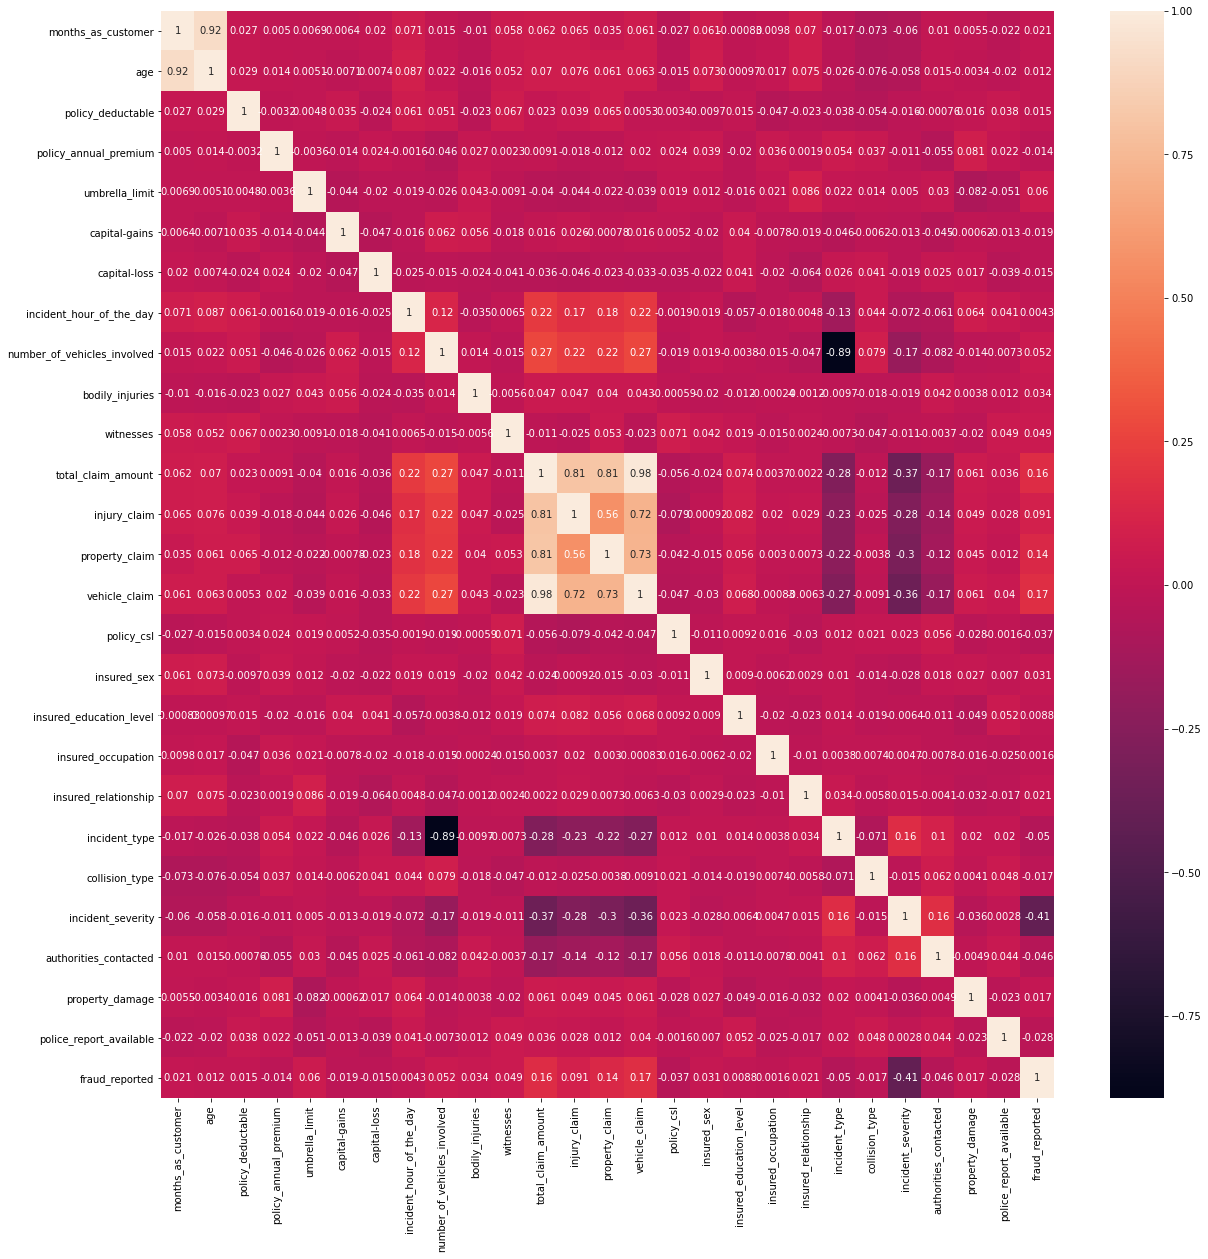

In [39]:
# Checking Co- relation
correlation = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

In [40]:
def vif(features):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['vif_factor'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    vif['features']=features.columns

    return vif.sort_values('vif_factor')
vif(transformed_df)

C:\Users\ashish\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif_factor,features
4,1.276470,umbrella_limit
24,1.473052,property_damage
25,1.493802,police_report_available
5,1.839503,capital-gains
16,1.900714,insured_sex
6,1.949570,capital-loss
15,2.436370,policy_csl
9,2.485667,bodily_injuries
10,2.844535,witnesses
22,2.965006,incident_severity


In [41]:
# UDF Function to drop the Columns
def dropp(df,t_col):
    df.drop(t_col,axis=1,inplace=True)
    pass

cols_to_drop=['injury_claim']
for i in cols_to_drop:
    dropp(transformed_df,i)
    print(f'Dropped Column : {i}')

Dropped Column : injury_claim


In [42]:
vif(transformed_df)

,vif_factor,features
4,1.276470,umbrella_limit
23,1.473052,property_damage
24,1.493802,police_report_available
5,1.839503,capital-gains
15,1.900714,insured_sex
6,1.949570,capital-loss
14,2.436370,policy_csl
9,2.485667,bodily_injuries
10,2.844535,witnesses
21,2.965006,incident_severity


In [43]:
# UDF Function to drop the Columns
def dropp(df,t_col):
    df.drop(t_col,axis=1,inplace=True)
    pass

cols_to_drop=['total_claim_amount']
for i in cols_to_drop:
    dropp(transformed_df,i)
    print(f'Dropped Column : {i}')

Dropped Column : total_claim_amount


In [44]:
vif(transformed_df)

,vif_factor,features
4,1.275548,umbrella_limit
22,1.472831,property_damage
23,1.493797,police_report_available
5,1.839182,capital-gains
14,1.899036,insured_sex
6,1.947965,capital-loss
13,2.427270,policy_csl
9,2.483811,bodily_injuries
10,2.842855,witnesses
20,2.964215,incident_severity


In [45]:
# UDF Function to drop the Columns
def dropp(df,t_col):
    df.drop(t_col,axis=1,inplace=True)
    pass

cols_to_drop=['age']
for i in cols_to_drop:
    dropp(transformed_df,i)
    print(f'Dropped Column : {i}')

Dropped Column : age


In [46]:
vif(transformed_df)

,vif_factor,features
3,1.275251,umbrella_limit
21,1.472666,property_damage
22,1.493793,police_report_available
4,1.838896,capital-gains
13,1.893853,insured_sex
5,1.938110,capital-loss
12,2.412654,policy_csl
8,2.479895,bodily_injuries
9,2.831746,witnesses
19,2.921217,incident_severity


In [47]:
# UDF Function to drop the Columns
def dropp(df,t_col):
    df.drop(t_col,axis=1,inplace=True)
    pass

cols_to_drop=['policy_annual_premium']
for i in cols_to_drop:
    dropp(transformed_df,i)
    print(f'Dropped Column : {i}')

Dropped Column : policy_annual_premium


In [48]:
vif(transformed_df)

,vif_factor,features
2,1.274439,umbrella_limit
20,1.457501,property_damage
21,1.492751,police_report_available
3,1.837809,capital-gains
12,1.886013,insured_sex
4,1.937297,capital-loss
11,2.392012,policy_csl
7,2.459262,bodily_injuries
8,2.808812,witnesses
18,2.873374,incident_severity


In [49]:
# UDF Function to drop the Columns
def dropp(df,t_col):
    df.drop(t_col,axis=1,inplace=True)
    pass

cols_to_drop=['vehicle_claim']
for i in cols_to_drop:
    dropp(transformed_df,i)
    print(f'Dropped Column : {i}')

Dropped Column : vehicle_claim


In [50]:
vif(transformed_df)

,vif_factor,features
2,1.274281,umbrella_limit
19,1.453321,property_damage
20,1.487382,police_report_available
3,1.836899,capital-gains
11,1.884523,insured_sex
4,1.932410,capital-loss
10,2.391184,policy_csl
7,2.452036,bodily_injuries
8,2.799469,witnesses
17,2.810486,incident_severity


In [51]:
# UDF Function to drop the Columns
def dropp(df,t_col):
    df.drop(t_col,axis=1,inplace=True)
    pass

cols_to_drop=['number_of_vehicles_involved']
for i in cols_to_drop:
    dropp(transformed_df,i)
    print(f'Dropped Column : {i}')

Dropped Column : number_of_vehicles_involved


In [52]:
vif(transformed_df)

,vif_factor,features
2,1.272595,umbrella_limit
18,1.443063,property_damage
19,1.483146,police_report_available
3,1.798498,capital-gains
10,1.843441,insured_sex
4,1.920550,capital-loss
14,2.232802,incident_type
9,2.357013,policy_csl
6,2.392334,bodily_injuries
16,2.733098,incident_severity


In [53]:
transformed_df = transformed_df.join(data['fraud_reported'],how='left')

In [54]:
# separating the feature and target columns
x=transformed_df.drop('fraud_reported',axis=1)
y=transformed_df['fraud_reported']

In [55]:
# # splitting the data for model training

# # splitting the data into training and test set
# from sklearn.model_selection import train_test_split
# train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355)

In [56]:
# 1. Normal Model
# Train and test split
 
def train_and_test_split(df,t_col,testsize=0.3):
    x = df.drop(t_col,axis=1)
    y = df[t_col]
    return train_test_split(x,y,test_size=testsize,random_state=0)

In [57]:
print(f"The Row of train_x is : {train_x.shape[0]} and the Column of train_x is : {train_x.shape[1]}")
print(f"The Row of test_x is : {test_x.shape[0]} and the Column of train_x is : {test_x.shape[1]}")
print(f"The Row of train_y is : {train_y.shape} and the Column of train_y is : {train_y.shape}")
print(f"The Row of test_y is : {test_y.shape} and the Column of train_y is : {test_y.shape}")

The Row of train_x is : 750 and the Column of train_x is : 26
The Row of test_x is : 250 and the Column of train_x is : 26
The Row of train_y is : (750,) and the Column of train_y is : (750,)
The Row of test_y is : (250,) and the Column of train_y is : (250,)


In [58]:
# Model Building Function 
def build_model(model_name,estimator,df,t_col):
    x_train,x_test,y_train,y_test = train_and_test_split(df,t_col) 
    estimator.fit(x_train,y_train) 
    y_pred = estimator.predict(x_test) 
    Accuracy= accuracy_score(y_test,y_pred) 
    temp = [model_name,Accuracy,y_pred] 
    return temp

In [59]:
def multiple_models(df,t_col):
    col_names = ['Model_Name','Accuracy_Score','Predictions']
    result = pd.DataFrame(columns=col_names)
    result.loc[len(result)] = build_model('LogisticRegression',LogisticRegression(),df,t_col)
    result.loc[len(result)] = build_model('Random_forest',RandomForestClassifier(),df,t_col)
    result.loc[len(result)] = build_model('RidgeClassifier',RidgeClassifier(),df,t_col)
    result.loc[len(result)] = build_model('SVC',SVC(),df,t_col)
    result.loc[len(result)] = build_model('DecisionTreeClassifier',DecisionTreeClassifier(),df,t_col)
    result.loc[len(result)] = build_model('KNeighborsClassifier',KNeighborsClassifier(),df,t_col)
    result.loc[len(result)] = build_model('AdaBoostClassifier',AdaBoostClassifier(),df,t_col)
    result.loc[len(result)] = build_model('GradientBoostingClassifier',GradientBoostingClassifier(),df,t_col)
    result.loc[len(result)] = build_model('XGBClassifier',XGBClassifier(),df,t_col)
    return result

In [61]:
multiple_models(transformed_df,'fraud_reported')

C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashish\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\ashish\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label 

[23:20:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model_Name,Accuracy_Score,Predictions
0,LogisticRegression,0.746667,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Random_forest,0.776667,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,RidgeClassifier,0.773333,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,SVC,0.743333,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,DecisionTreeClassifier,0.680000,"[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
5,KNeighborsClassifier,0.683333,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,AdaBoostClassifier,0.770000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,GradientBoostingClassifier,0.783333,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
8,XGBClassifier,0.786667,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."


In [69]:
# Cross Validation

def k_fold_cv(x,y,fold=10):
    
    score_lr = cross_val_score(LogisticRegression(),x,y,cv=fold)
    score_svr = cross_val_score(RandomForestClassifier(),x,y,cv=fold)
    score_lasso = cross_val_score(RidgeClassifier(),x,y,cv=fold)
    score_Ridge = cross_val_score(SVC(),x,y,cv=fold)
    score_DT = cross_val_score(DecisionTreeClassifier(),x,y,cv=fold)
    score_Xgboost = cross_val_score(KNeighborsClassifier(),x,y,cv=fold)
    score_Ada = cross_val_score(AdaBoostClassifier(),x,y,cv=fold)
    score_RM = cross_val_score(RandomForestClassifier(),x,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingClassifier(),x,y,cv=fold)
    score_KNN = cross_val_score(KNeighborsClassifier(),x,y,cv=fold)
    
    
    model_names=['LogisticRegression','RandomForestClassifier','RidgeClassifier','SVC','DecisionTreeClassifier','KNeighborsClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']
    score = [score_lr,score_svr,score_lasso,score_Ridge,score_DT,score_Xgboost,score_Ada,score_RM,score_GB,score_KNN]
    
    result = []
    
    for i in range(0,len(model_names)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_std]
        result.append(temp)
    
    
    Kfold_df = pd.DataFrame(result,columns=['model_names','score_mean','score_std'])
    return Kfold_df

In [70]:
k_fold_cv(transformed_df.drop('fraud_reported',axis=1),transformed_df['fraud_reported'])

C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

,model_names,score_mean,score_std
0,LogisticRegression,0.754,0.012806
1,RandomForestClassifier,0.788,0.039192
2,RidgeClassifier,0.761,0.039357
3,SVC,0.753,0.004583
4,DecisionTreeClassifier,0.710,0.040000
5,KNeighborsClassifier,0.692,0.035440
6,AdaBoostClassifier,0.783,0.040262
7,GradientBoostingClassifier,0.785,0.041533
8,XGBClassifier,0.802,0.055821


In [77]:
def tuning(x,y,kfold=10):
    
    # parameter Grid
    
    param_ridge = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    param_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    param_tree = {'criterion':['gini','entropy']}
    param_gboost = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_ada = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_xg = {'alpha':[0,1],'gamma':[10,20,30,40,50,60,70,80,90,100],'reg_lambda':[0,1]}
    
    # Hyper Parameter tuning
    
    tune_ridge = GridSearchCV(RidgeClassifier(),param_ridge,cv=kfold)
    tune_knn = GridSearchCV(KNeighborsClassifier(),param_knn,cv=kfold)
    tune_tree = GridSearchCV(DecisionTreeClassifier(),param_tree,cv=kfold)
    #tune_gboost = GridSearchCV(GradientBoostingClassifier(),param_gboost,cv=kfold)
    tune_ada = GridSearchCV(AdaBoostClassifier(),param_ada,cv=kfold)
    tune_xg = GridSearchCV(XGBClassifier(),param_xg,cv=kfold)
    
    
    #Fitting x and y
    tune_ridge.fit(x,y)
    tune_knn.fit(x,y)
    tune_tree.fit(x,y)
    #tune_gboost.fit(x,y)
    tune_ada.fit(x,y)
    tune_xg.fit(x,y)
    
    tune = [tune_ridge,tune_knn,tune_tree,tune_ada,tune_xg]
    models = ['Ridge','KNN','Tree','Ada','XG']
    
    for i in range(0,len(tune)):
        print('Model',models[i])
        print('best_parameters',tune[i].best_params_)
tuning(transformed_df.drop('fraud_reported',axis=1),transformed_df['fraud_reported'])

C:\Users\ashish\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [80]:
# Cross Validation with tuned parameters


def k_fold_cv_tune(x,y,fold=10):
    
    score_lg = cross_val_score(LogisticRegression(),x,y,cv=fold)
    score_svc= cross_val_score(SVC(),x,y,cv=fold)
    score_rf= cross_val_score(RandomForestClassifier(),x,y,cv=fold)
    score_dt= cross_val_score(DecisionTreeClassifier(criterion='entropy'),x,y,cv=fold)
    score_knn= cross_val_score(KNeighborsClassifier(n_neighbors=30),x,y,cv=fold)
    score_ridge= cross_val_score(RidgeClassifier(alpha=4),x,y,cv=fold)
    score_ada= cross_val_score(AdaBoostClassifier(learning_rate=0.1),x,y,cv=fold)
    score_gb= cross_val_score(GradientBoostingClassifier(),x,y,cv=fold)
    score_xgb= cross_val_score(XGBClassifier(alpha=0,gamma=20,reg_lambda=0),x,y,cv=fold)
    
    
    model_names= ['LogisticRegression','SVC','RandomForest','DecisionTree','KNN','Ridge',"adaboost",'Gboost','Xgboost']
    score=[score_lg,score_svc,score_rf,score_dt,score_knn,score_ridge,score_ada,score_gb,score_xgb]
    
    result=[]
    
    for i in range(0,len(model_names)):
        score_mean= np.mean(score[i])
        score_std= np.std(score[i])
        m_names= model_names[i]
        temp= [m_names,score_mean,score_std]
        
        result.append(temp)
        
        
    kfold_df= pd.DataFrame(result,columns=['model_names','score_mean','score_std'])
    return kfold_df
k_fold_cv_tune(transformed_df.drop('fraud_reported',axis=1),transformed_df['fraud_reported'])

C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[23:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model_names,score_mean,score_std
0,LogisticRegression,0.754,0.012806
1,SVC,0.753,0.004583
2,RandomForest,0.785,0.033242
3,DecisionTree,0.718,0.041183
4,KNN,0.753,0.004583
5,Ridge,0.763,0.039509
6,adaboost,0.812,0.045343
7,Gboost,0.803,0.055326
8,Xgboost,0.811,0.043920
